In [16]:
!pip install snapml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 35.6 MB/s eta 0:00:00


In [1]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler,normalize
from __future__ import print_function
import time
import matplotlib.pyplot as plt

In [2]:
# The dataset includes information about transactions made by credit cards in September 2013 by European cardholders.It is a real_time data

url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"
df=pd.read_csv(url)
print("There are "+ str(len(df)) + " observations in the credit card fraud dataset.")
print("There are "+ str(len(df.columns)) + " features/variables in the credit card fraud dataset.")

There are 284807 observations in the credit card fraud dataset.
There are 31 features/variables in the credit card fraud dataset.


In [3]:
# Due to the fact that we want to simulate a large data_set which is a typical example of a real life data_set, we are going to inflate what we have times 10

replica=10
new_big_data=pd.DataFrame(np.repeat(df.values,replica,axis=0),columns=df.columns)

In [4]:
print("There are "+ str(len(new_big_data)) + " observations in the credit card fraud dataset.")
print("There are "+ str(len(new_big_data.columns)) + " features/variables in the credit card fraud dataset.")

There are 2848070 observations in the credit card fraud dataset.
There are 31 features/variables in the credit card fraud dataset.


In [5]:
new_big_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


In [6]:
labels=new_big_data.Class.unique()
print(labels)

[0. 1.]


In [19]:
sizes = new_big_data.Class.value_counts().values
print(sizes)

[2843150    4920]


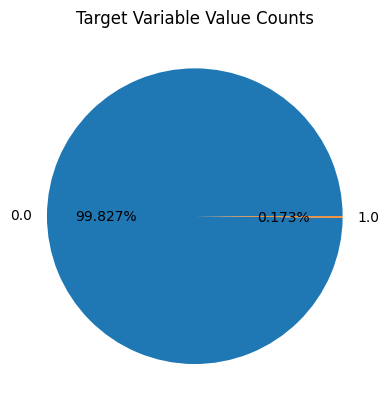

In [8]:
fig,ax=plt.subplots()
ax.pie(sizes,labels=labels,autopct="%1.3f%%")
ax.set_title('Target Variable Value Counts')
plt.show()

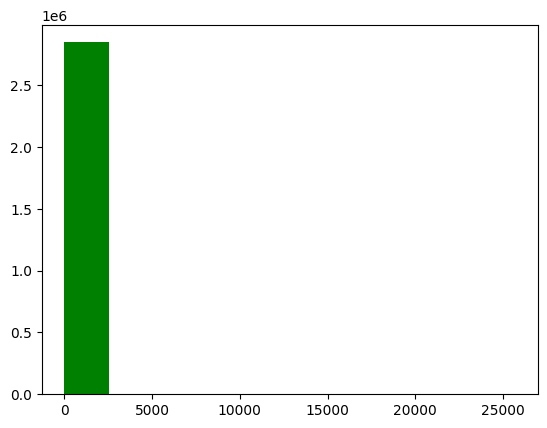

In [9]:
plt.hist(new_big_data.Amount.values,10,histtype="bar",color="g")
plt.show()

In [10]:
print("Minimum amount value is ", np.min(new_big_data.Amount.values))
print("Maximum amount value is ", np.max(new_big_data.Amount.values))
print("90% of the transactions have an amount less or equal to ", np.percentile(df.Amount.values, 90))

Minimum amount value is  0.0
Maximum amount value is  25691.16
90% of the transactions have an amount less or equal to  203.0


In [11]:
# Now going to data processing, we standardize our data using scaling/normalization for easy convergence
new_big_data.iloc[:,1:30]=StandardScaler().fit_transform(new_big_data.iloc[:,1:30])
data_matrix=new_big_data.values
x= data_matrix[:,1:30]
y=data_matrix[:,30]
x= normalize (x, norm='l1')

In [12]:
print("The shape of x is "+str(x.shape)+" while that of y is "+str(y.shape))

The shape of x is (2848070, 29) while that of y is (2848070,)


In [13]:
#Now we separate the samples to both training and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=34,stratify=y)
print('X_train.shape=', x_train.shape, 'y_train.shape=', y_train.shape)
print('X_test.shape=', x_test.shape, 'y_test.shape=', y_test.shape)

X_train.shape= (1993649, 29) y_train.shape= (1993649,)
X_test.shape= (854421, 29) y_test.shape= (854421,)


In [14]:
# Because the target is highly unbalanced,we need to make the algorithm focus more on the minority.
w_train=compute_sample_weight("balanced",y_train)

from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=4,random_state=32)

#Train the model
t0=time.time()
model.fit(x_train,y_train,sample_weight=w_train)
SKlearn_time=time.time()-t0
print("[Scikit-Learn] Training time (s):  {0:.5f}".format(SKlearn_time))

[Scikit-Learn] Training time (s):  48.70488


In [17]:
# evaluating both snapml decision tree algorithm and  sklearn decision tree algorithm



# Now using the snap ML decision tree classifier
from snapml import DecisionTreeClassifier
#making n_jobs=4 uses 4 CPU core in the training while n_jobs=1 uses all the available cpu cores
snap_regr=DecisionTreeClassifier(max_depth=4,random_state=62,n_jobs=1)

#Starting the training
t0 = time.time()
snap_regr.fit(x_train, y_train, sample_weight=w_train)
snapml_time = time.time()-t0

print("[Snap ML] Training time (s):  {0:.5f}".format(snapml_time))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[Snap ML] Training time (s):  13.22784


In [24]:
## Evaluating the two models
training_speedup = SKlearn_time/snapml_time
print('[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : {0:.2f}x '.format(training_speedup))

sklearn_pred=model.predict_proba(x_test)[:,1]

# Area under the receiver operating curve is a metric used in measuring thr accuracy of a classification model

sklearn_aoc=roc_auc_score(y_test,sklearn_pred)
print("[Sklearn] ROC_AUC score is : {0:.3f}".format(sklearn_aoc))

snapml_pred=snap_regr.predict_proba(x_test)[:,1]

# Area under the receiver operating curve is a metric used in measuring the accuracy of a classification model

snapml_aoc=roc_auc_score(y_test,snapml_pred)
print("[Snap ML] ROC_AUC score is : {0:.3f}".format(snapml_aoc))

[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : 3.68x 
[Sklearn] ROC_AUC score is : 0.973
[Snap ML] ROC_AUC score is : 0.973


In [26]:
from sklearn.svm import LinearSVC

sklearn_svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)
t0 = time.time()
sklearn_svm.fit(x_train, y_train)
sklearn_time = time.time() - t0
print("[Scikit-Learn] Training time (s):  {0:.2f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  96.29


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [28]:
from snapml import SupportVectorMachine

snapml_svm = SupportVectorMachine(class_weight='balanced', random_state=25, n_jobs=4, fit_intercept=False)
print(snapml_svm.get_params())

# train an SVM model using Snap ML
t0 = time.time()
model = snapml_svm.fit(x_train, y_train)
snapml_time = time.time() - t0
print("[Snap ML] Training time (s):  {0:.2f}".format(snapml_time))

{'class_weight': 'balanced', 'device_ids': [], 'fit_intercept': False, 'gamma': 1.0, 'generate_training_history': None, 'intercept_scaling': 1.0, 'kernel': 'linear', 'loss': 'hinge', 'max_iter': 1000, 'n_components': 100, 'n_jobs': 4, 'normalize': False, 'random_state': 25, 'regularizer': 1.0, 'tol': 0.001, 'use_gpu': False, 'verbose': False}
[Snap ML] Training time (s):  17.26


In [31]:
# compute the Snap ML vs Scikit-Learn training speedup
training_speedup = sklearn_time/snapml_time
print('[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : {0:.2f}x '.format(training_speedup))

# run inference using the Scikit-Learn model
# get the confidence scores for the test samples
sklearn_pred = sklearn_svm.decision_function(x_test)

# evaluate accuracy on test set
acc_sklearn  = roc_auc_score(y_test, sklearn_pred)
print("[Scikit-Learn] ROC-AUC score:   {0:.3f}".format(acc_sklearn))

# run inference using the Snap ML model
# get the confidence scores for the test samples
snapml_pred = snapml_svm.decision_function(x_test)

# evaluate accuracy on test set
acc_snapml  = roc_auc_score(y_test, snapml_pred)
print("[Snap ML] ROC-AUC score:   {0:.3f}".format(acc_snapml))

print(sklearn_pred[0:5])
print(snapml_pred[0:5])

[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : 5.58x 
[Scikit-Learn] ROC-AUC score:   0.986
[Snap ML] ROC-AUC score:   0.986
[-0.48169633 -0.90837096 -0.615448   -0.03338625 -1.07674466]
[-0.40405897 -0.9223241  -0.63351491 -0.21548208 -1.06882122]


In [32]:
## Hinge loss is another metric we can use to measure the accuracy of SupportVectorMachine
from sklearn.metrics import hinge_loss
from snapml.metrics import hinge_loss

sklearn_pred= sklearn_svm.decision_function(x_test)
snapml_pred= snapml_svm.decision_function(x_test)

sklearn_loss=hinge_loss(y_test,sklearn_pred)
snapml_loss=hinge_loss(y_test,snapml_pred)

print("SKlearn_SupportVectorMachine Hinge-loss is : {0:.3f}".format(sklearn_loss))
print("Snapml_SupportVectorMachine Hinge_loss is : {0:.3f}".format(snapml_loss))

SKlearn_SupportVectorMachine Hinge-loss is : 0.233
Snapml_SupportVectorMachine Hinge_loss is : 0.233
